

# RAVDESS: Ryerson Audio-Visual Database of Emotional Speech and Song

---

The data contains around **~7,356 files** with a total size **24.8 GB**.

It has **24 professional actors** (12 female, 12 male) So it's a balanced data set
by Ryerson Audio Visual Database of emotional Speech and songs

Each actor vocalizes two lexically matched statements in a **neutral North American accent**.

---

## Key Highlights:

Balanced across gender (**12F, 12M**).
Includes both **speech** and **song** modalities.
High-quality recordings designed for research in emotion recognition.
Total size: **~24.8 GB**

---

## Speech Emotions:

- Neutral,
- Happy,
- Sad,
- Angry,
- Fearful,
- Surprise,
- and Disgust

---

## Songs Emotions:

- Neutral,
- Happy,
- Sad,
- Angry,
- Fearful emotions

---

## Access:
The dataset can be accessed using the Deep Lake API for direct streaming into ML pipelines

---

## Possible Use Cases:

- Call Center Analytics

- Mental Health Monitoring

- Music Emotion Recognition

---

## Goal:

- A mental health support tool that flags distress from speech tone.

---


In [4]:
!pip install deeplake<4 pandas tensorflow matplotlib scikit-learn seaborn

/bin/bash: line 1: 4: No such file or directory


Setting up the folder to download my data to the drive

In [5]:
from google.colab import drive
drive.mount("/content/drive")
drive_path = '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData'

Mounted at /content/drive


Downloading + Unzipping the data from Zenodo

In [6]:
# !wget -c https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip -O /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/Audio_Speech_Actors_01-24.zip

# !unzip -q /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/Audio_Speech_Actors_01-24.zip -d /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped

# !ls /content/drive/MyDrive/VoiceEmotionDetection/RavdessData


--2025-09-20 11:26:38--  https://zenodo.org/record/1188976/files/Audio_Speech_Actors_01-24.zip
Resolving zenodo.org (zenodo.org)... 188.185.43.25, 188.185.48.194, 188.185.45.92, ...
Connecting to zenodo.org (zenodo.org)|188.185.43.25|:443... connected.
HTTP request sent, awaiting response... 301 MOVED PERMANENTLY
Location: /records/1188976/files/Audio_Speech_Actors_01-24.zip [following]
--2025-09-20 11:26:38--  https://zenodo.org/records/1188976/files/Audio_Speech_Actors_01-24.zip
Reusing existing connection to zenodo.org:443.
HTTP request sent, awaiting response... 416 REQUESTED_RANGE_NOT_SATISFIABLE

    The file is already fully retrieved; nothing to do.

replace /content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_01/03-01-01-01-01-01-01.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
n
n
Audio_Speech_Actors_01-24.zip  FullDataUnzipped


In [7]:
data_path = '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped'

In [8]:
import glob # To extract data from

audio_files = glob.glob('/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_*/*.wav',  recursive=True)


In [9]:
audio_files

['/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-01-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-01-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-02-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-01-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-01-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-01-01-02-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-02-01-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-01-02-02-08.wav',
 '/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/FullDataUnzipped/Actor_08/03-01-02-02-01-01-0

In [18]:
from os.path import basename
import os, glob
import pandas as pd

# Emotions according to the path name
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

data = []
for f in audio_files:
  parts = os.path.basename(f).split('-')
  emotion_id = parts[2]
  actor_id = parts[-1].split('.')[0]


  data.append({
        "filename": f,
        "emotion_id": emotion_id,
        "emotion": emotion_map[emotion_id],
        "actor": int(actor_id)
  })

df = pd.DataFrame(data)
df.head()

,filename,emotion_id,emotion,actor
0,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
1,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
2,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8
3,/content/drive/MyDrive/VoiceEmotionDetection/R...,02,calm,8
4,/content/drive/MyDrive/VoiceEmotionDetection/R...,02,calm,8


In [19]:
import librosa
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt

In [20]:
audio_path_0 = df.iloc[0]['filename']

y, sr = librosa.load(audio_path_0)

In [21]:
Audio(data=y, rate=sr) # Testing the path as well as the Aduio

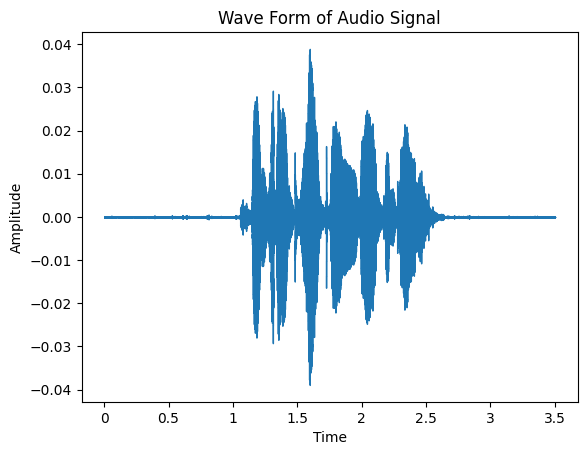

In [22]:
plt.Figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Wave Form of Audio Signal")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

In [27]:
# Preprocessing Pipeline
import scipy.signal as signal
import numpy as np

def preprocessing_pipeline(audio_path,target_sr=16000,
                           top_db=20,
                           lowcut=80,
                           highcut=4000,
                           duration=3.0):

  # Loading the audio files
  y, sr = librosa.load(audio_path, sr=target_sr)

  # Converting to mono if it's in other channels
  if y.ndim > 1:
    y = librosa.to_mono(y)

  # Getting rid of sileneced parts

  y, _ = librosa.effects.trim(y, top_db=top_db)

 # Audio filtering

  b, a = signal.butter(N=6, Wn=[lowcut/(sr/2), highcut/(sr/2)], btype='band')
  y = signal.filtfilt(b, a, y)


  # Normalization

  y = librosa.util.normalize(y)

  # Pad to fixed duration

  target_length = int(duration * sr)
  if len(y) < target_length:
    pad_width = target_length - len(y)
    y = np.pad(y, (0, pad_width))
  else:
    y = y[:target_length]

  return y, sr



In [28]:
import os
import numpy as np
from tqdm import tqdm  # progress bar

# Directory where processed audio will be saved
processed_dir = "/content/drive/MyDrive/VoiceEmotionDetection/RavdessData/Processed"
os.makedirs(processed_dir, exist_ok=True)

def process_and_save(row):
    """Apply preprocessing pipeline and save result as .npy"""
    try:
        y, sr = preprocessing_pipeline(row["filename"])
        # Build unique name: actor_emotion_index.npy
        base_name = f"actor{row['actor']}_{row['emotion']}_{os.path.basename(row['filename']).split('.')[0]}.npy"
        out_path = os.path.join(processed_dir, base_name)
        np.save(out_path, y)
        return out_path
    except Exception as e:
        print(f"Error processing {row['filename']}: {e}")
        return None

# Apply to DataFrame with progress bar
df["processed_file"] = [
    process_and_save(row) for _, row in tqdm(df.iterrows(), total=len(df))
]

df.head()


100%|██████████| 1440/1440 [00:21<00:00, 67.48it/s]


,filename,emotion_id,emotion,actor,processed_file
0,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8,/content/drive/MyDrive/VoiceEmotionDetection/R...
1,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8,/content/drive/MyDrive/VoiceEmotionDetection/R...
2,/content/drive/MyDrive/VoiceEmotionDetection/R...,01,neutral,8,/content/drive/MyDrive/VoiceEmotionDetection/R...
3,/content/drive/MyDrive/VoiceEmotionDetection/R...,02,calm,8,/content/drive/MyDrive/VoiceEmotionDetection/R...
4,/content/drive/MyDrive/VoiceEmotionDetection/R...,02,calm,8,/content/drive/MyDrive/VoiceEmotionDetection/R...


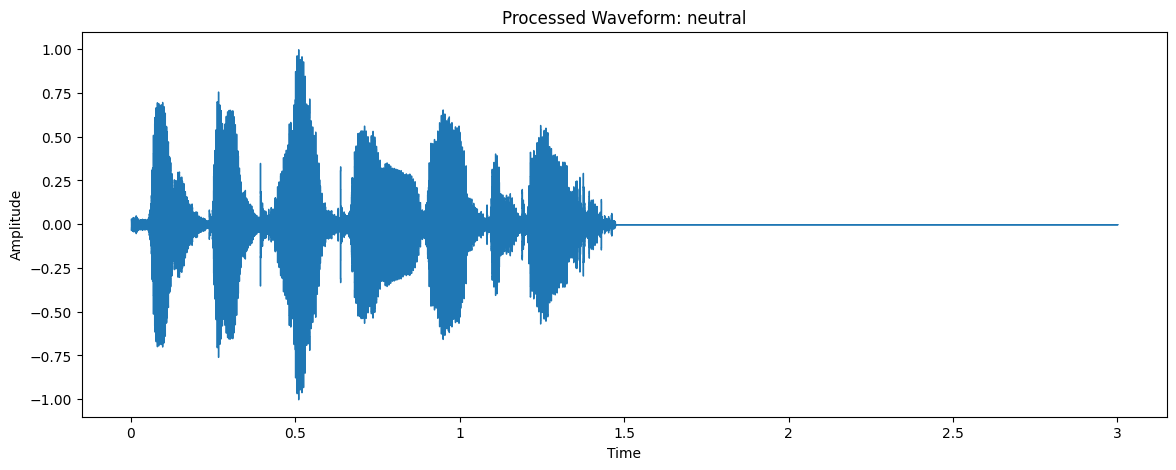

In [29]:
import matplotlib.pyplot as plt
import librosa.display

y = np.load(df.iloc[0]["processed_file"])
sr = 16000

plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)
plt.title(f"Processed Waveform: {df.iloc[0]['emotion']}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()